## Problem Statement
* HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
* After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. 
* The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 
* Then, categorise the countries using some socio-economic and health factors that determine the overall development of the country.  
* Suggest the top five countries to the CEO that needs financial aid.

In [281]:
import warnings
warnings.filterwarnings("ignore")

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [283]:
from IPython.display import display

## Importing and Reading the Data

In [284]:
Country = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [285]:
pd.options.display.max_columns = None
pd.set_option("display.max_rows", 200)
display(Country)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


In [286]:
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [287]:
# Let's check the dimensions of the dataframe
Country.shape

(167, 10)

In [288]:
Country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Cleaning the data and looking for Missing values 

In [289]:
Country.isnull().sum()
# there is no null values in any column 

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [290]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [291]:
Country.exports = (Country.exports / 100 ) * (Country.gdpp)
Country.health = (Country.health / 100 ) * (Country.gdpp)
Country.imports = (Country.imports / 100 ) * (Country.gdpp)

In [292]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Univariate Analysis

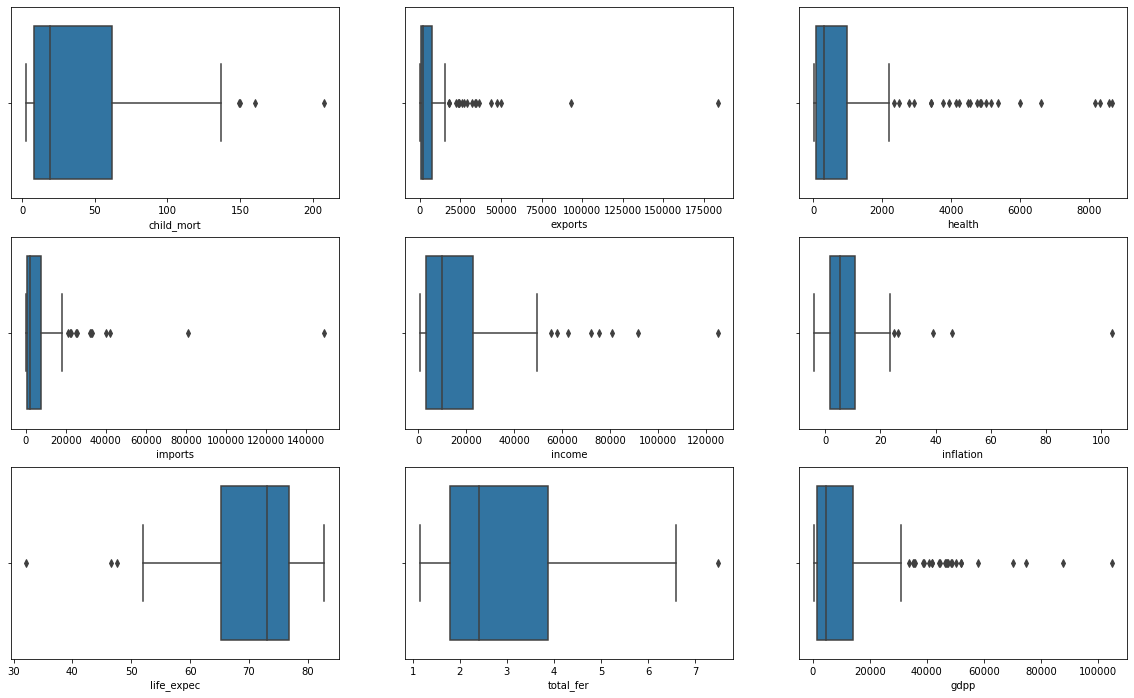

In [293]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(Country.child_mort)
plt.subplot(3,3,2)
sns.boxplot(Country.exports)
plt.subplot(3,3,3)
sns.boxplot(Country.health)
plt.subplot(3,3,4)
sns.boxplot(Country.imports)
plt.subplot(3,3,5)
sns.boxplot(Country.income)
plt.subplot(3,3,6)
sns.boxplot(Country.inflation)
plt.subplot(3,3,7)
sns.boxplot(Country.life_expec)
plt.subplot(3,3,8)
sns.boxplot(Country.total_fer)
plt.subplot(3,3,9)
sns.boxplot(Country.gdpp)
plt.show()

In [294]:
# gdpp have some outliers

In [295]:
#gdpp seems to have a lot of outliers
Country.gdpp.describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

## Bivariate Analyis

In [296]:
#import cartopy.crs as ccrs
from math import floor
import matplotlib.pyplot as plt
from matplotlib import patheffects

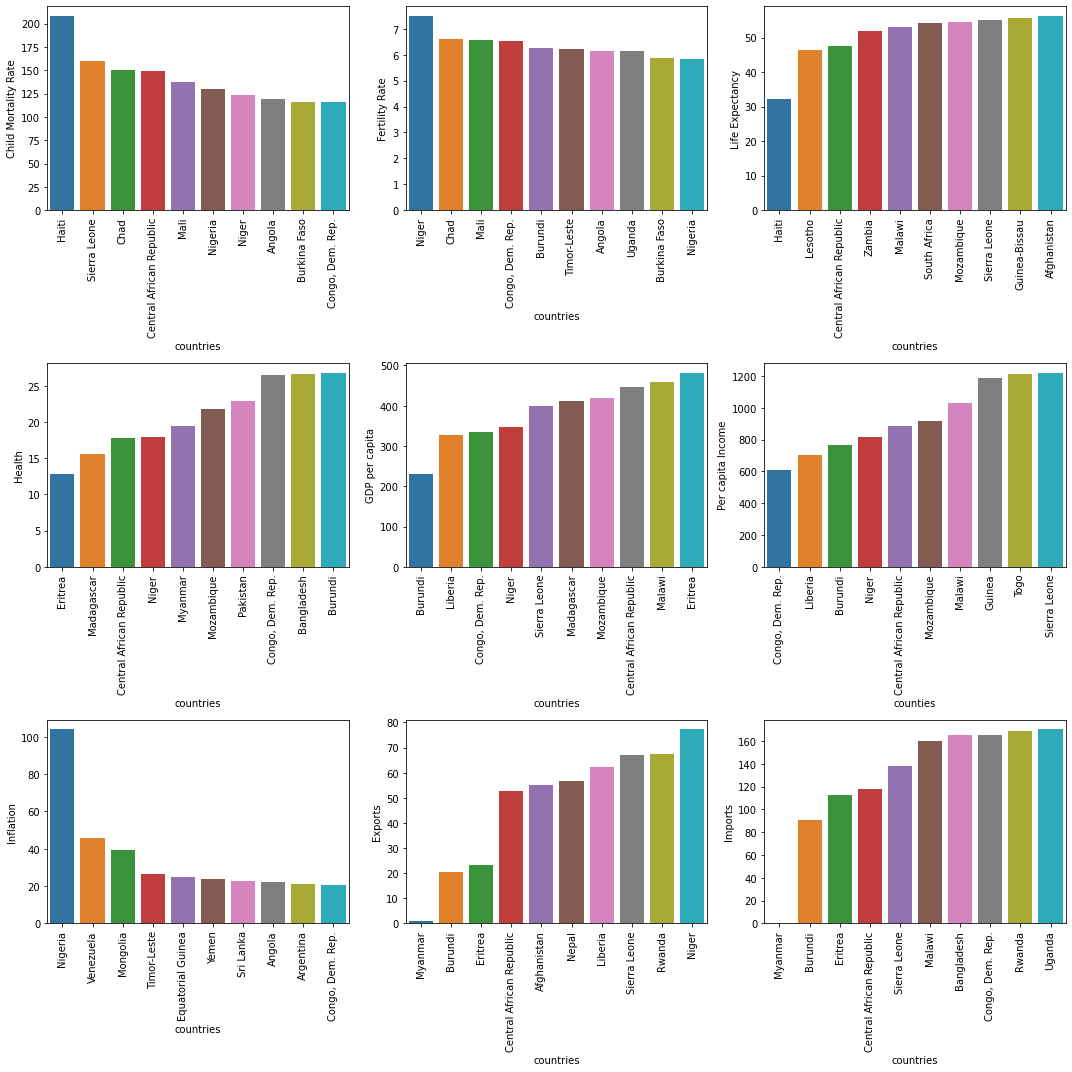

In [297]:
#fig, axs = plt.subplots()
fig, axs = plt.subplots(nrows=3, ncols=3, squeeze=False, figsize=(15,15))
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

child_mort1 = Country[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= child_mort1, ax = axs[0,0])
plt1.set(xlabel = 'countries', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same

total_fer1 = Country[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= total_fer1, ax = axs[0,1])
plt1.set(xlabel = 'countries', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

life_expec1 = Country[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data = life_expec1, ax = axs[0,2])
plt1.set(xlabel = 'countries', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

health1 = Country[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data = health1, ax = axs[1,0])
plt1.set(xlabel = 'countries', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

gdpp1 = Country[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= gdpp1, ax = axs[1,1])
plt1.set(xlabel = 'countries', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

income1 = Country[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= income1, ax = axs[1,2])
plt1.set(xlabel = 'counties', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

inflation1 = Country[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= inflation1, ax = axs[2,0])
plt1.set(xlabel = 'countries', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

exports1 = Country[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data=exports1, ax = axs[2,1])
plt1.set(xlabel = 'countries', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

imports1 = Country[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= imports1, ax = axs[2,2])
plt1.set(xlabel = 'countries', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

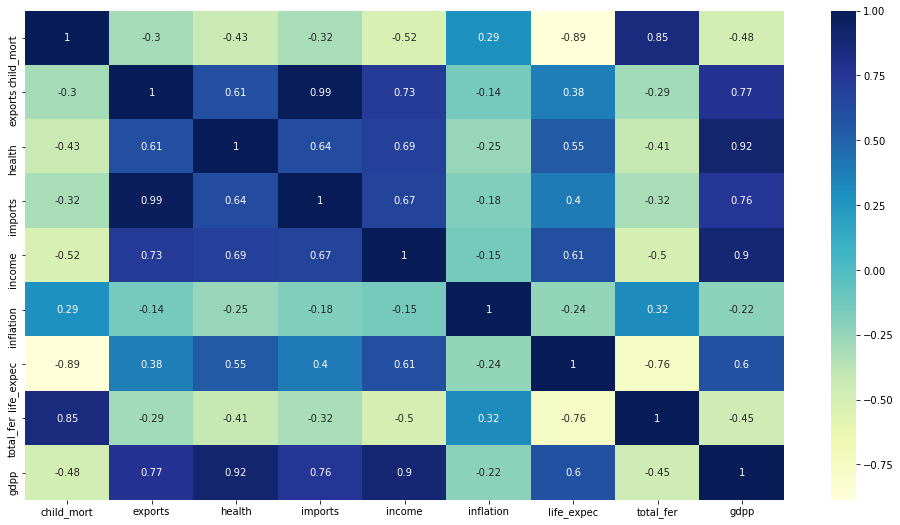

In [298]:
plt.figure(figsize = (17, 9))
sns.heatmap(Country.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [299]:
# exports, health and imports are given as percentage of GDP. 
#Hence, to get the actual value of these quantities multiply these columns 
# by (GDP/100) or quantity =  0.01*percentagevalue *GDP

In [300]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [301]:
#removing country column
Cntry = Country.drop('country', axis = 1)

In [302]:
Cntry.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


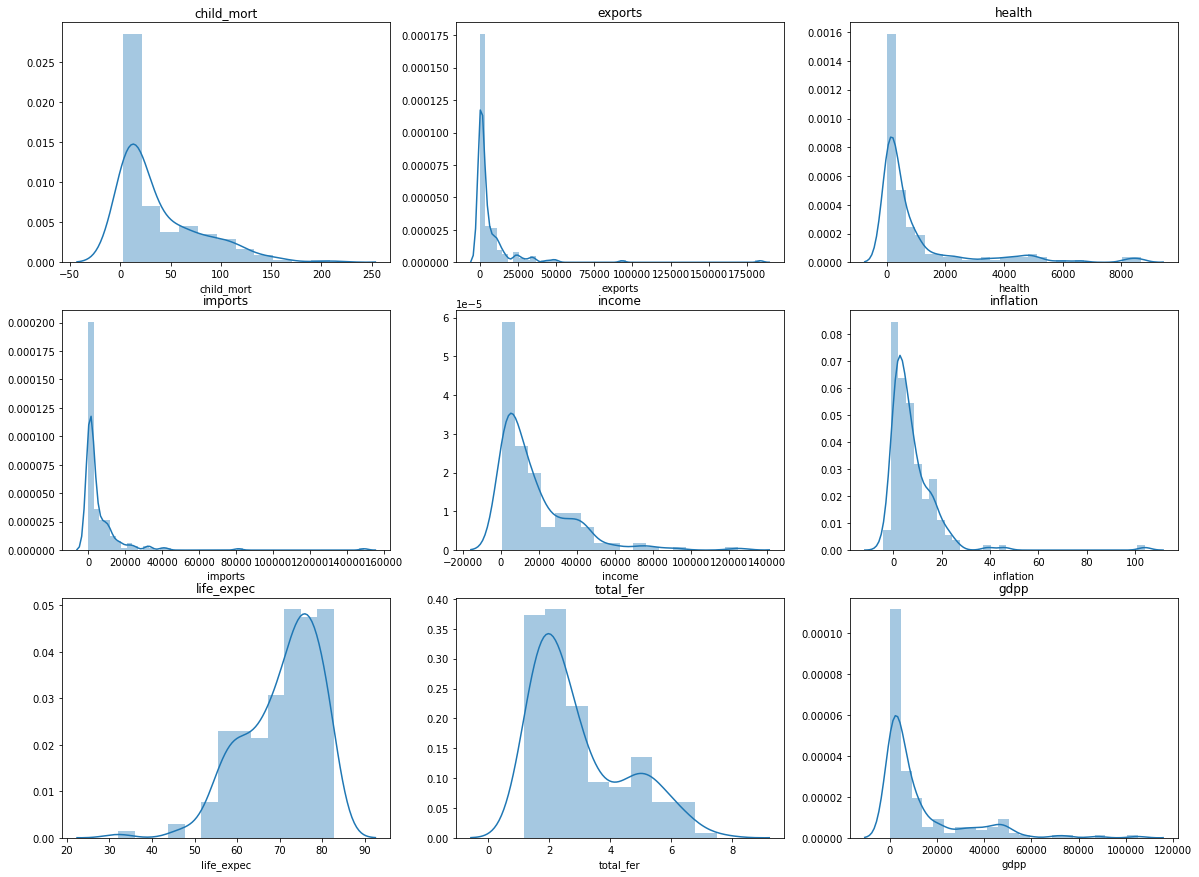

In [303]:
plt.figure(figsize=(20,15))
x = Cntry.columns
for i in enumerate(x):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(Cntry[i[1]])
    plt.title(str(i[1]))

#### We could see that all the varibles have skewness
#### All of them are skewed towards right , except life_expec which is skewed left
#### Signs of outliers thats needs to be checked

In [304]:
#skewness of each feature before transforming the data
Cntry.skew()

child_mort    1.450774
exports       6.720171
health        2.526029
imports       6.618500
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

## Outlier Analysis
* From the above plots we have outliers in all the attributes
* Difference could be because there are poor countries and highly sophisticated countries
* All the rows represents different countries so removing outliers will cause data loss which is not a feasible solution
* Above box plot shows many outliers clearly indicating rich countries with high gdpp
* Using **Power transformer** to transform the data to get rid of skewness instead of standard scaler()

In [305]:
from sklearn.preprocessing import PowerTransformer
p = PowerTransformer()
Cntryy = pd.DataFrame(p.fit_transform(Cntry))
Cntryy.columns = Cntry.columns

In [306]:
Cntryy.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.266699,-1.658719,-1.239313,-1.246055,-1.368935,0.459416,-1.526455,1.544053,-1.462273
1,-0.220994,-0.238427,-0.042924,-0.055108,0.012538,-0.154659,0.621738,-0.992833,-0.121133
2,0.217834,-0.030785,-0.270052,-0.266188,0.232275,1.059790,0.652698,0.313175,-0.063195
3,1.506186,0.100544,-0.661987,-0.219429,-0.408251,1.512843,-1.239045,1.623128,-0.219666
4,-0.637380,0.602677,0.563269,0.758134,0.572583,-0.723442,0.699553,-0.368063,0.609228


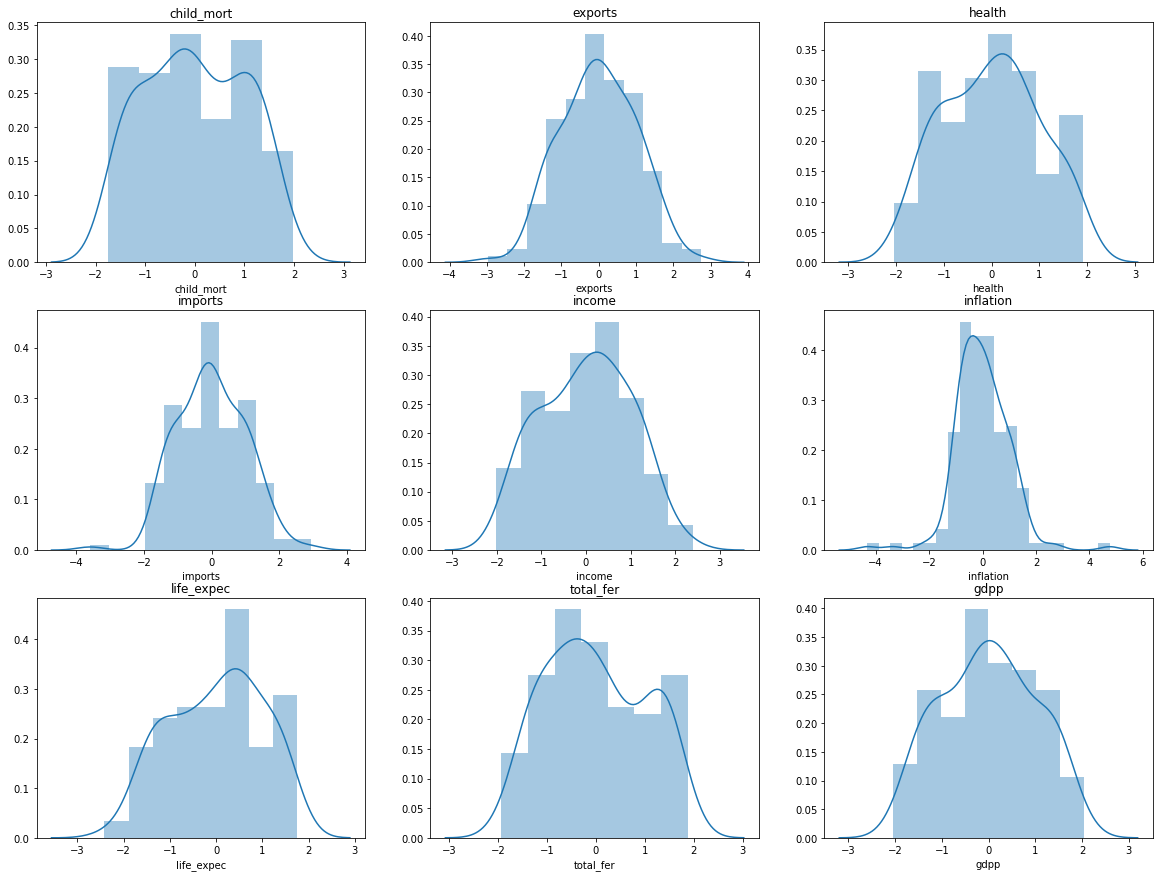

In [307]:
# Now lets look at the skewness
plt.figure(figsize=(20,15))
x = Cntryy.columns
for i in enumerate(x):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(Cntryy[i[1]])
    plt.title(str(i[1]))

## Modelling

 #### Hopkins test

In [308]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [309]:
hopkins(Cntry)
# before transforming data

0.9628792611211989

* Hopkins value at around 80% or more assures us that the dataset is clusterable.

## K means

In [310]:
kmeans = KMeans(n_clusters=4, max_iter=50, random_state= 50)
kmeans.fit(Cntryy)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [311]:
kmeans.labels_

array([1, 0, 0, 1, 2, 0, 0, 3, 3, 0, 2, 2, 1, 2, 2, 3, 0, 1, 0, 0, 2, 0,
       0, 3, 2, 1, 1, 1, 1, 3, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 3, 3,
       3, 0, 0, 0, 0, 0, 1, 2, 0, 3, 3, 0, 1, 0, 3, 1, 3, 2, 0, 1, 1, 0,
       1, 2, 3, 1, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 1, 1, 2, 2, 1,
       1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 3, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1,
       3, 3, 1, 1, 3, 2, 1, 2, 0, 0, 0, 2, 3, 3, 2, 2, 1, 0, 2, 1, 2, 2,
       1, 3, 2, 3, 1, 0, 3, 3, 0, 0, 1, 0, 3, 3, 1, 1, 2, 1, 1, 0, 0, 2,
       0, 1, 0, 3, 3, 3, 2, 0, 0, 0, 0, 1, 1])

## Finding optimal number of clusters

#### SSD or elbow curve 
Elbow curve is done to figure out the optimal number of clusters based on maximum intra-cluster distance and minimum intercluster distance (at the point of the elbow)

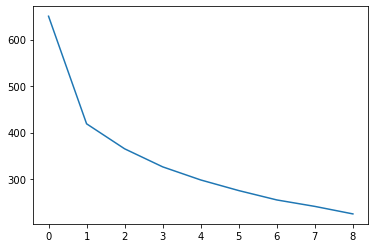

In [312]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Cntryy)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

* Here, the elbow seems to appear at index 1 (i.e. cluster = 3). So, 3 is chosen as the optimal number of clusters

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [313]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Cntryy)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(Cntryy, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.444208665439015
For n_clusters=3, the silhouette score is 0.39709048040442907
For n_clusters=4, the silhouette score is 0.31150321040732315
For n_clusters=5, the silhouette score is 0.3136853641719506
For n_clusters=6, the silhouette score is 0.2786304469879498
For n_clusters=7, the silhouette score is 0.2698526487708071
For n_clusters=8, the silhouette score is 0.270735575351482
For n_clusters=9, the silhouette score is 0.2536198354227153
For n_clusters=10, the silhouette score is 0.2246019823169897


* Here, we see that the maximum value occurs at 2. Clusters 3 and 4 have high values, right next to cluster = 2. Since, 2 is usually not preferred for any business problems, 3 is chosen.

In [314]:
# final model with k=3
kmeans = KMeans(n_clusters=3, random_state= 50)
kmeans.fit(Cntryy)

KMeans(n_clusters=3, random_state=50)

In [315]:
kmeans.labels_

array([1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1])

In [316]:
Cntry.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [317]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [318]:
Country['cluster_id'] = kmeans.labels_
Country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,0


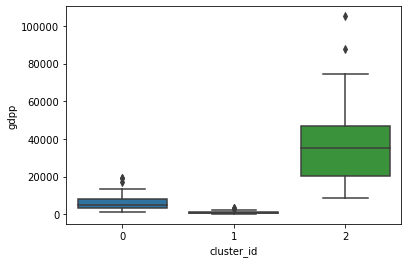

In [319]:
sns.boxplot(x='cluster_id', y='gdpp', data=Country)
plt.show()

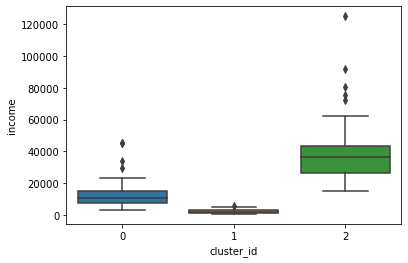

In [320]:
sns.boxplot(x='cluster_id', y='income', data=Country)
plt.show()

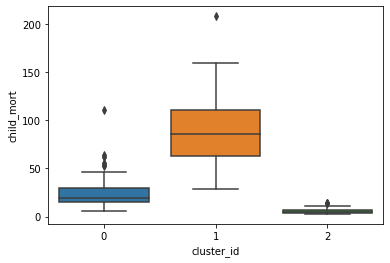

In [321]:
sns.boxplot(x='cluster_id', y='child_mort', data=Country)
plt.show()

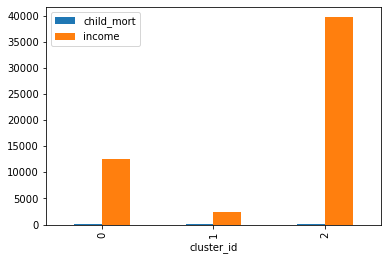

In [322]:
Country.drop(['country', 'gdpp','exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')
plt.show()

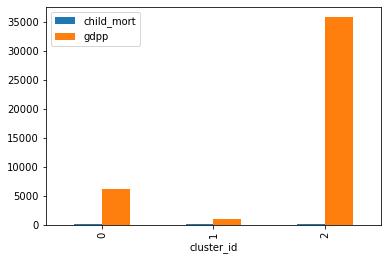

In [323]:
Country.drop(['country', 'income','exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')
plt.show()

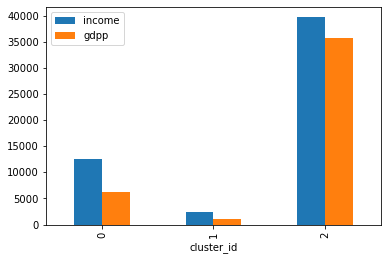

In [324]:
Country.drop(['country', 'child_mort','exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')
plt.show()

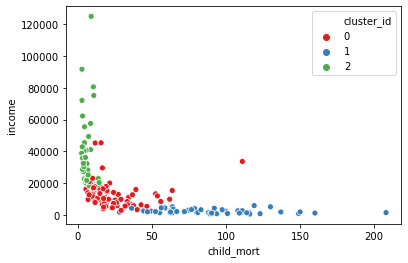

In [325]:
sns.scatterplot(x = 'child_mort', y = 'income' , hue = 'cluster_id' ,data = Country, palette = 'Set1')
plt.show()

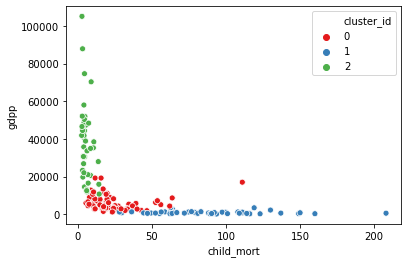

In [326]:
sns.scatterplot(x = 'child_mort', y = 'gdpp' , hue = 'cluster_id' ,data = Country, palette = 'Set1')
plt.show()

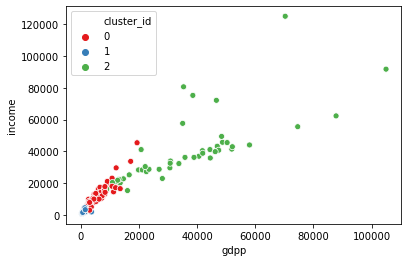

In [327]:
sns.scatterplot(x = 'gdpp', y = 'income' , hue = 'cluster_id' ,data = Country, palette = 'Set1')
plt.show()

## Heirarchical clustering

In [328]:
Cntryy.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.266699,-1.658719,-1.239313,-1.246055,-1.368935,0.459416,-1.526455,1.544053,-1.462273
1,-0.220994,-0.238427,-0.042924,-0.055108,0.012538,-0.154659,0.621738,-0.992833,-0.121133
2,0.217834,-0.030785,-0.270052,-0.266188,0.232275,1.059790,0.652698,0.313175,-0.063195
3,1.506186,0.100544,-0.661987,-0.219429,-0.408251,1.512843,-1.239045,1.623128,-0.219666
4,-0.637380,0.602677,0.563269,0.758134,0.572583,-0.723442,0.699553,-0.368063,0.609228


## Single heirarchical clustering

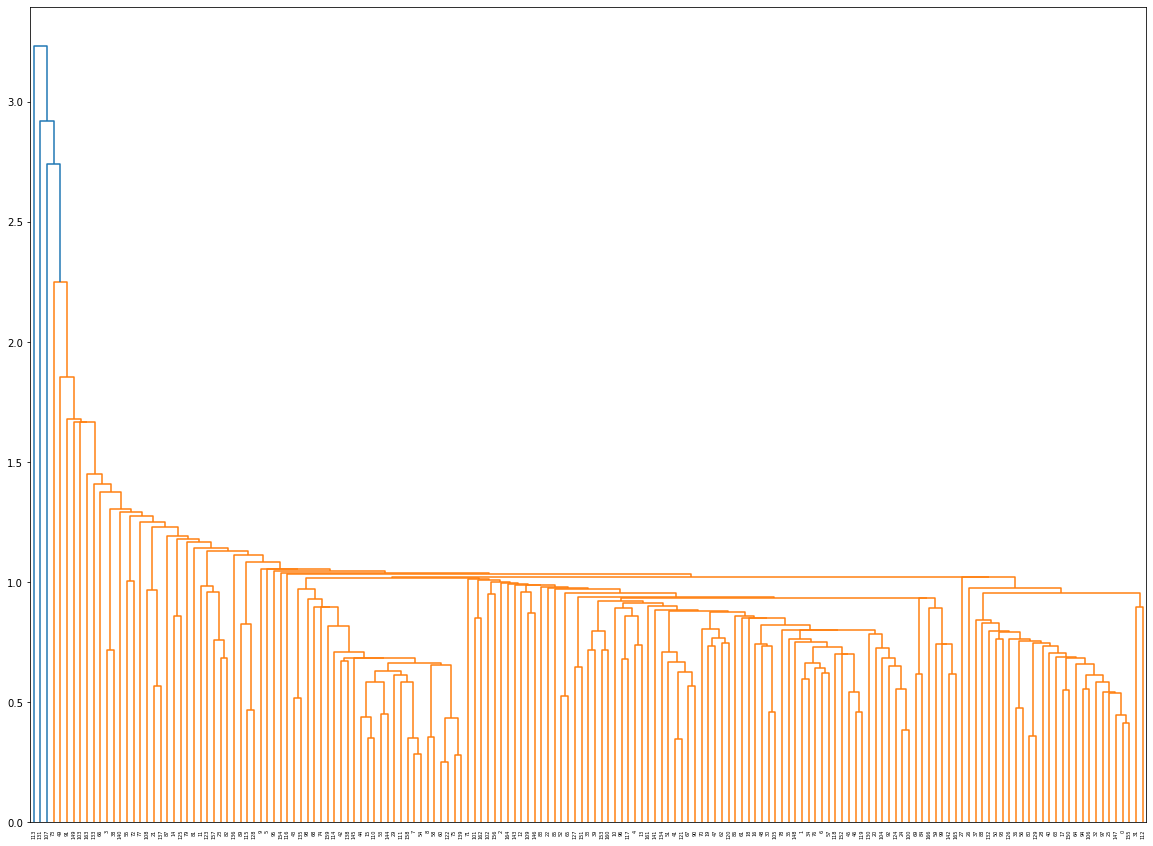

In [329]:
plt.figure(figsize = (20,15))
mergings = linkage(Cntryy, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

## Complete heirarchical clustering

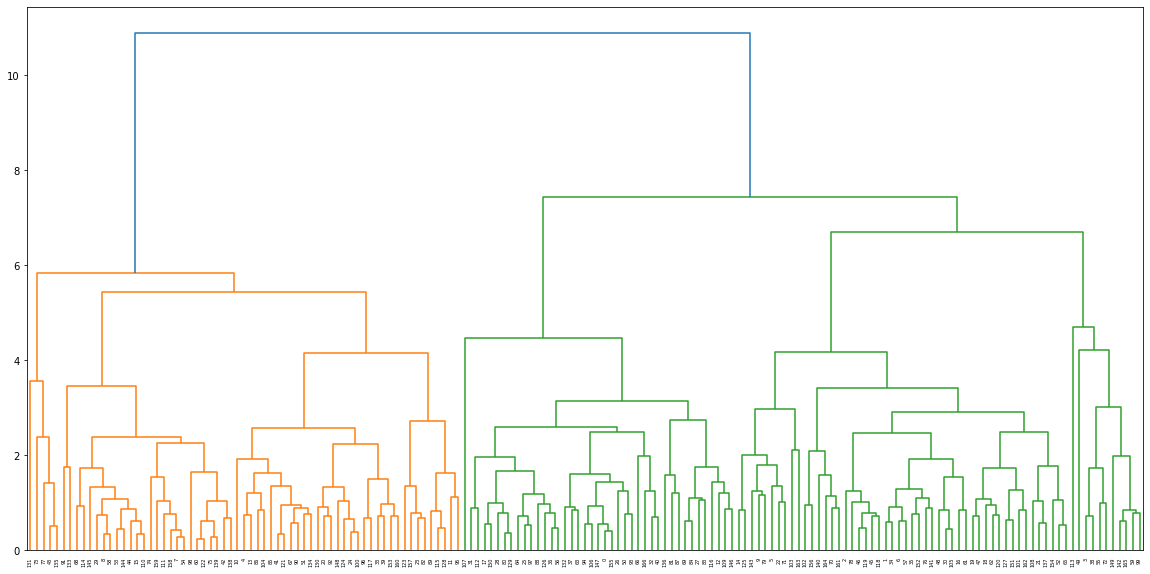

In [330]:
plt.figure(figsize = (20,10))
mergings = linkage(Cntryy, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [331]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0,
       2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0])

In [332]:
Country['cluster_labels'] = cluster_labels
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,2


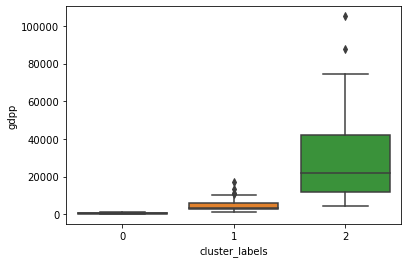

In [333]:
sns.boxplot(x='cluster_labels', y='gdpp', data=Country)
plt.show()

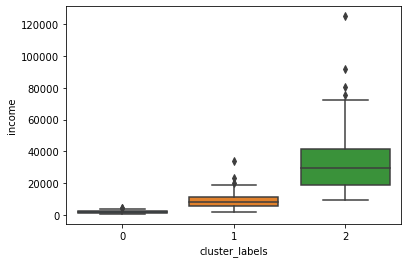

In [334]:
sns.boxplot(x='cluster_labels', y='income', data = Country)
plt.show()

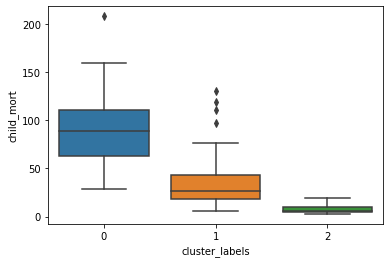

In [335]:
sns.boxplot(x='cluster_labels', y='child_mort', data=Country)
plt.show()

In [336]:
Country[Country['cluster_id'] == 1 ].sort_values(by = ['income', 'child_mort','gdpp'], ascending = ['True', 'False', 'True']).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,1,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,1,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,1,0


In [337]:
Country[Country['cluster_id'] == 0].sort_values(by = ['income', 'child_mort','gdpp'], ascending = ['True', 'False', 'True']).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950,2.62,63.0,3.50,2970,0,1
101,"Micronesia, Fed. Sts.",40.0,672.10,406.120,2316.60,3340,3.80,65.4,3.46,2860,0,1
102,Moldova,17.2,638.96,190.710,1279.55,3910,11.10,69.7,1.27,1630,0,1
164,Vietnam,23.3,943.20,89.604,1050.62,4490,12.10,73.1,1.95,1310,0,1
151,Tonga,17.4,440.20,179.985,2140.65,4980,3.68,69.9,3.91,3550,0,1


In [338]:
Country[Country['cluster_id'] == 2].sort_values(by = ['income', 'child_mort','gdpp'], ascending = ['True', 'False', 'True']).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
13,Barbados,14.2,6320.00,1275.200,7792.00,15300,0.321,76.7,1.78,16000,2,2
86,Lebanon,10.3,3171.88,622.858,5333.72,16300,0.238,79.8,1.61,8860,2,2
85,Latvia,7.8,6068.10,754.840,6226.30,18300,-0.812,73.1,1.36,11300,2,2
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.440,76.8,2.13,12200,2,2
41,Croatia,5.5,5076.00,1047.600,5143.50,20100,0.821,76.3,1.55,13500,2,2


In [339]:
Country[Country['cluster_labels'] == 0].sort_values(by = ['income', 'child_mort', 'gdpp'], ascending = ['True', 'False', 'True']).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,1,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,1,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,1,0


In [340]:
Country[Country['cluster_labels'] == 1].sort_values(by = ['income', 'child_mort', 'gdpp'], ascending = ['True', 'False', 'True']).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
149,Timor-Leste,62.6,79.20,328.320,1000.80,1850,26.50,71.1,6.23,3600,1,1
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950,2.62,63.0,3.50,2970,0,1
59,Ghana,74.7,386.45,68.382,601.29,3060,16.60,62.2,4.27,1310,1,1
99,Mauritania,97.4,608.40,52.920,734.40,3320,18.90,68.2,4.98,1200,1,1
101,"Micronesia, Fed. Sts.",40.0,672.10,406.120,2316.60,3340,3.80,65.4,3.46,2860,0,1


In [341]:
Country[Country['cluster_labels'] == 2].sort_values(by = ['income', 'child_mort', 'gdpp'], ascending = ['True', 'False', 'True']).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
20,Bosnia and Herzegovina,6.9,1369.17,511.710,2364.93,9720,1.40,76.8,1.31,4610,0,2
96,Maldives,13.2,5509.60,449.430,4643.40,10500,2.88,77.9,2.23,7100,0,2
92,"Macedonia, FYR",10.4,1806.92,321.886,2637.74,11400,2.04,74.0,1.47,4540,0,2
130,Serbia,7.6,1779.89,562.640,2591.39,12700,5.88,74.7,1.40,5410,0,2
39,Costa Rica,10.2,2722.40,893.800,2870.00,13000,6.57,80.4,1.92,8200,0,2


* It is observed that some factors `income`, `child_mort` and  `gdpp` plays a vital role in deciding a socio-economic status of a country.So, the country that needs aid are also chosen.

## Clearly from the above clusters formed the five top most countries that needs financial aid are as follows:
1. Congo, Dem. Rep
2. Liberia
3. Burundi
4. Niger
5. Central African Republic